In [1]:
# Stammdaten
rawdataFolder = "C:\\Users\\joerg_j\\switchdrive\\PSI\\22_e-Instrumentation\\HERO\\IPA\\Rohdaten"
campaignId    = "04_Setup_6"
measurementId = "200225_1"
signalAmplitude = 0.2

In [2]:
import sys
sys.path.append("../toolbox/")
from workflow import *
from jitterClass import analyseMeasurement
import importlib

read done


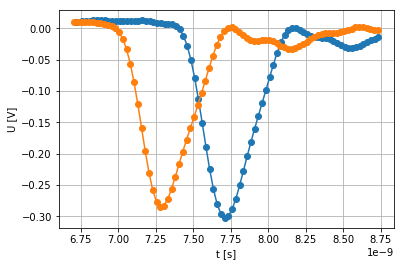

showRawPulse done


In [3]:
M18_02 = analyseMeasurement(rawdataFolder, campaignId, measurementId, signalAmplitude, diagnose = True)

M18_02.read()

M18_02.showRawPulse(pulseNr = 0, style="o-")

In [19]:
M18_02.diagnose(False, True, True, figsize=(8,4))

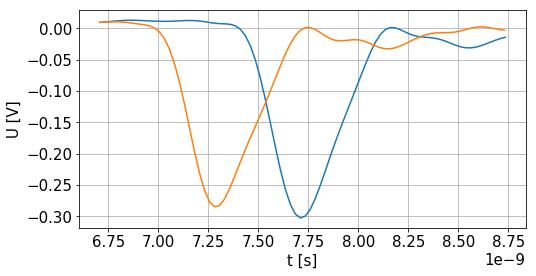

showRawPulse done


In [20]:
M18_02.showRawPulse(pulseNr = 0, style="-")

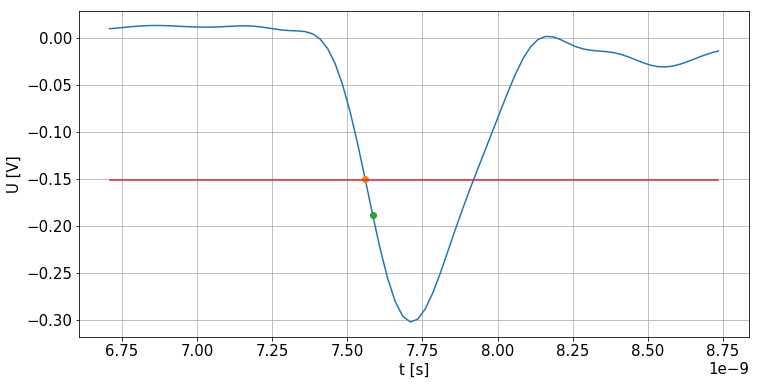

xt: 7.559957820939026e-09 ps, yt -0.1512835068340337 ps


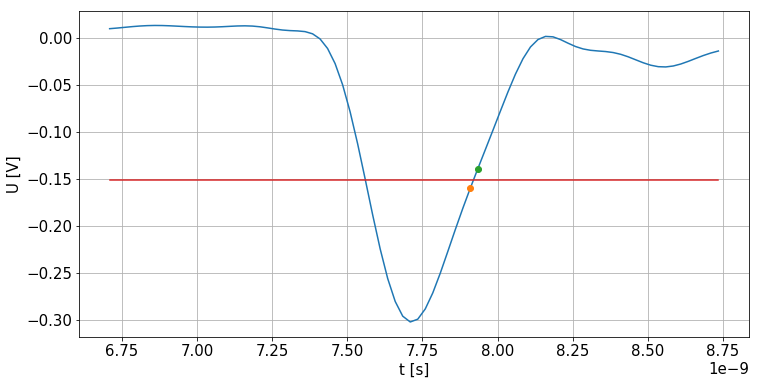

xt: 7.919899663748661e-09 ps, yt -0.1512835068340337 ps


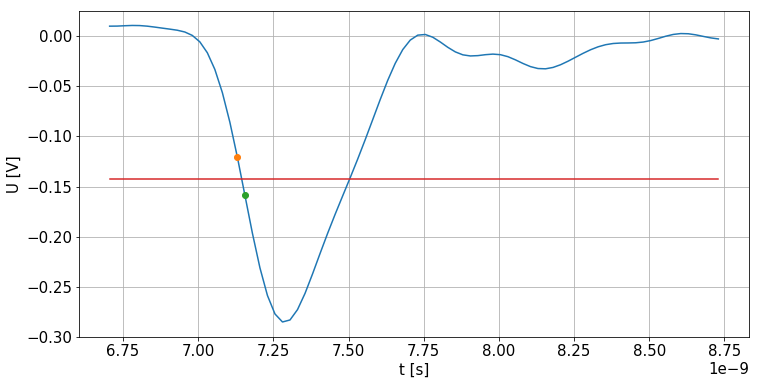

xt: 7.144570209972613e-09 ps, yt -0.14238139498274904 ps


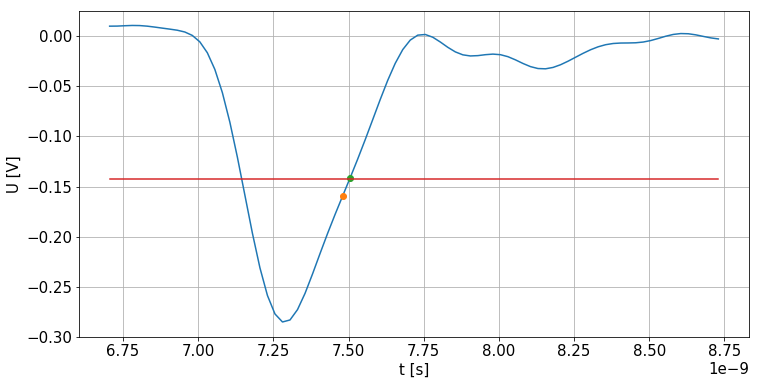

xt: 7.503783787294472e-09 ps, yt -0.14238139498274904 ps
calculateDelta done
calculateDelta done
calculateDelta done


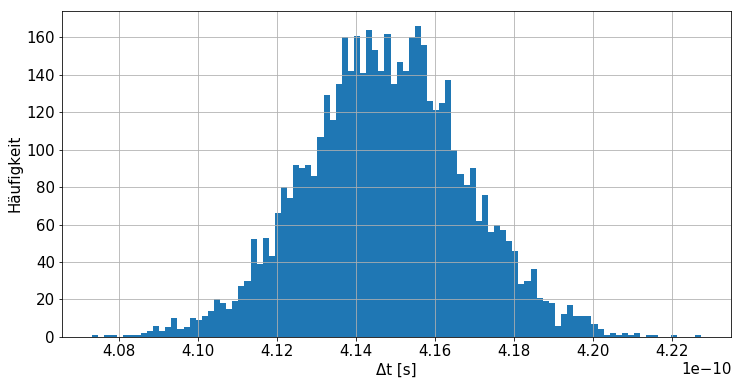

histogram done


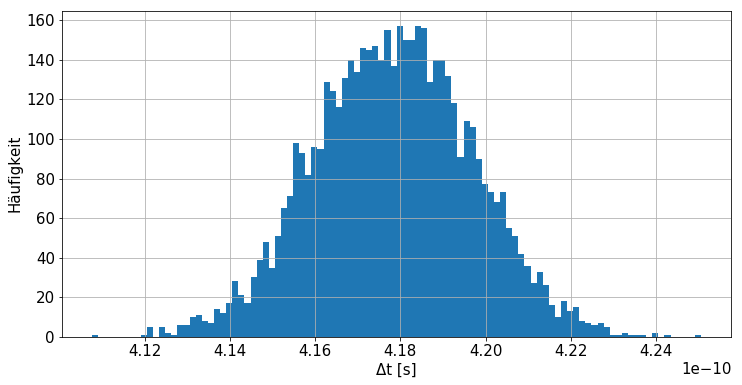

histogram done


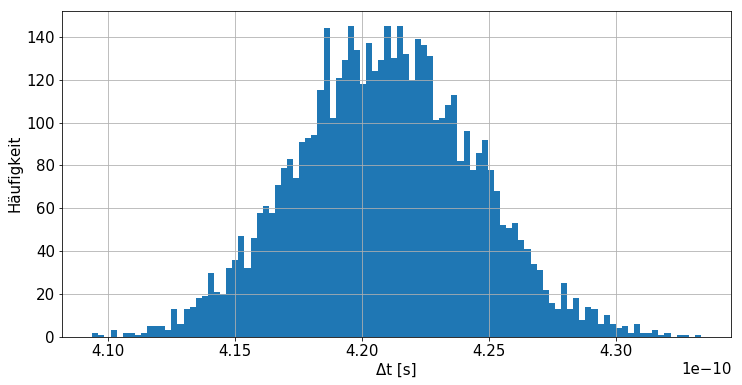

histogram done
53


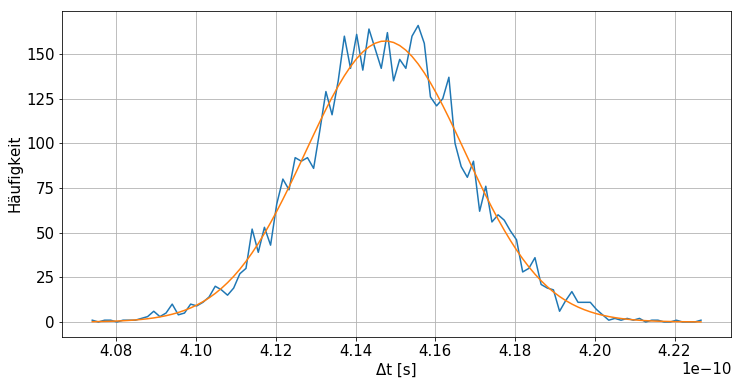

parameter: [7.86484691e-10 4.14746216e-10 1.99426787e-12] [A, mu, sigma]
fitHist done
50


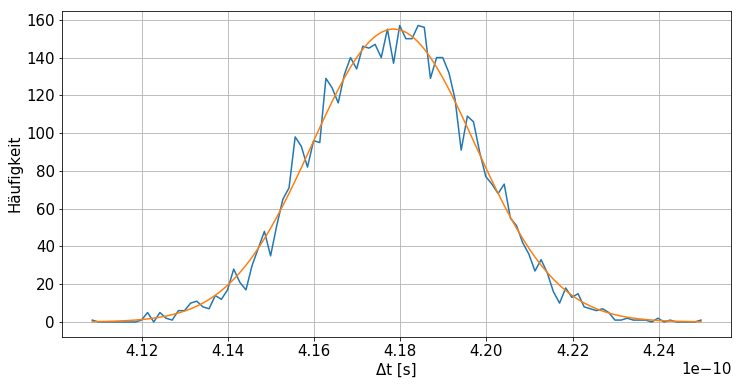

parameter: [7.35705220e-10 4.17842245e-10 1.89161596e-12] [A, mu, sigma]
fitHist done
42


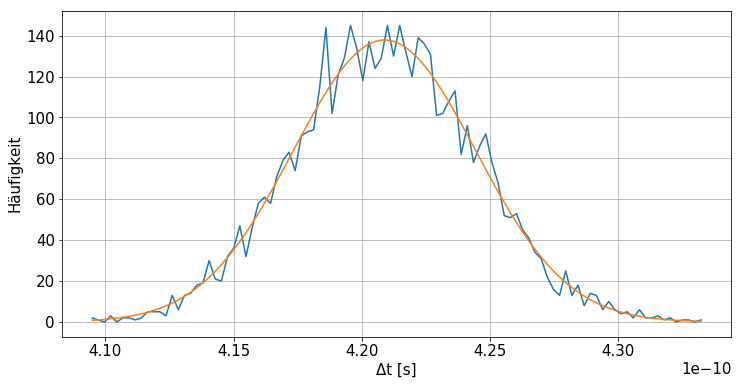

parameter: [1.23172472e-09 4.20890146e-10 3.56274994e-12] [A, mu, sigma]
fitHist done


In [18]:
absolute = False
threshold = 0.5

if(absolute):
    s = "Abs"
else:
    s = "Rel"
name = "thres{:d}".format(int(threshold * 100)) + s
 
M18_02.threshold(absolute = absolute, threshold = threshold)

M18_02.calculateDelta(name + "F", M18_02.data["thres"][name][0,0,:,0], M18_02.data["thres"][name][1,0,:,0])
M18_02.calculateDelta(name + "C", M18_02.data["thres"][name][0,1,:,0], M18_02.data["thres"][name][1,1,:,0])
M18_02.calculateDelta(name + "R", M18_02.data["thres"][name][0,2,:,0], M18_02.data["thres"][name][1,2,:,0])

M18_02.histogram(name + "F", name + "F")
M18_02.histogram(name + "C", name + "C")
M18_02.histogram(name + "R", name + "R")

M18_02.fitHist(name + "F", name + "F")
M18_02.fitHist(name + "C", name + "C")
M18_02.fitHist(name + "R", name + "R")

In [6]:
M18_02.showResult(name + "F")
print("---------------------------------------------------------------------------------------")
M18_02.showResult(name + "C")
print("---------------------------------------------------------------------------------------")
M18_02.showResult(name + "R")

σ_0: 1.9942678692533289 ps
σ_1: 1.4101603338514759 ps
σ_1 = σ_0 / sqrt(2)

μ: 414.746215958609 ps

coma separated [σ_0, σ_1, μ]
1.994267869253329e-12,1.4101603338514759e-12,4.14746215958609e-10

 tab separated [σ_0, σ_1, μ]
1.994267869253329e-12	1.4101603338514759e-12	4.14746215958609e-10
---------------------------------------------------------------------------------------
σ_0: 1.8916159551907066 ps
σ_1: 1.337574469316017 ps
σ_1 = σ_0 / sqrt(2)

μ: 417.84224477680436 ps

coma separated [σ_0, σ_1, μ]
1.8916159551907066e-12,1.337574469316017e-12,4.178422447768044e-10

 tab separated [σ_0, σ_1, μ]
1.8916159551907066e-12	1.337574469316017e-12	4.178422447768044e-10
---------------------------------------------------------------------------------------
σ_0: 3.562749938192107 ps
σ_1: 2.5192446409675915 ps
σ_1 = σ_0 / sqrt(2)

μ: 420.8901457341212 ps

coma separated [σ_0, σ_1, μ]
3.562749938192107e-12,2.5192446409675915e-12,4.208901457341212e-10

 tab separated [σ_0, σ_1, μ]
3.56274993819210

iPeak: 40 iLeft: 31 iRight: 53


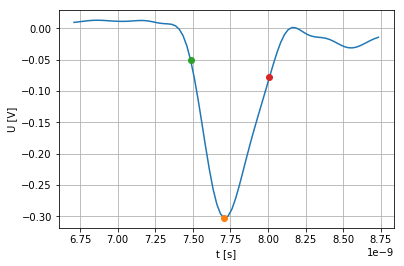

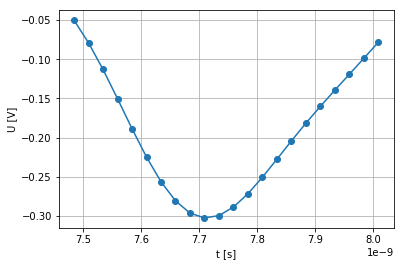

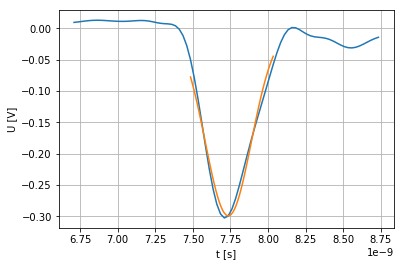

parameter: [-1.14825174e-10  7.73573869e-09  1.53060507e-10] [A, mu, sigma]
iPeak: 23 iLeft: 15 iRight: 37


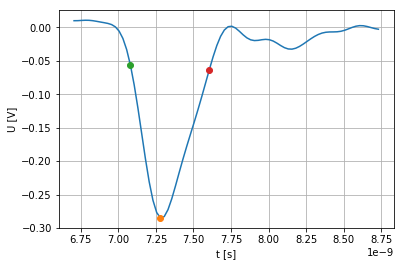

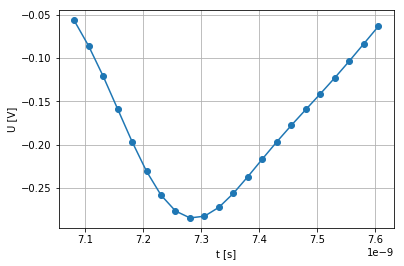

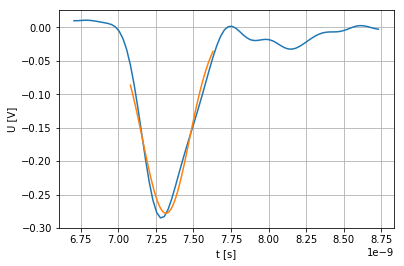

parameter: [-1.07973197e-10  7.31700067e-09  1.55010669e-10] [A, mu, sigma]
fitGauss done
calculateDelta done


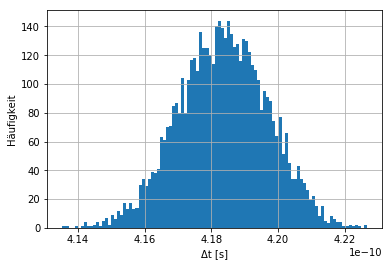

histogram done
51


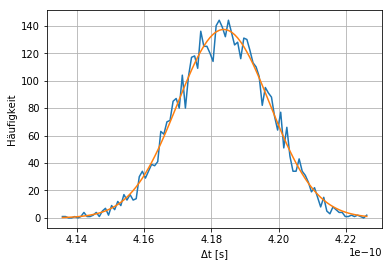

parameter: [4.70766167e-10 4.18367283e-10 1.36771153e-12] [A, mu, sigma]
fitHist done


In [7]:
M18_02.fitGauss(threshold = 0.2, diagnosePulse=0)

M18_02.calculateDelta("gauss", M18_02.data["gauss"][0,:,1], M18_02.data["gauss"][1,:,1])

M18_02.histogram("gauss", "gauss")

M18_02.fitHist("gauss", "gauss")

In [8]:
M18_02.showResult("gauss")

σ_0: 1.3677115344680637 ps
σ_1: 0.9671181007294262 ps
σ_1 = σ_0 / sqrt(2)

μ: 418.36728269440863 ps

coma separated [σ_0, σ_1, μ]
1.3677115344680637e-12,9.671181007294262e-13,4.183672826944086e-10

 tab separated [σ_0, σ_1, μ]
1.3677115344680637e-12	9.671181007294262e-13	4.183672826944086e-10


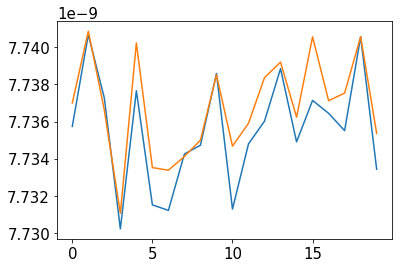

In [17]:
plt.plot(M18_02.data["gauss"][0,:,1][:20])
plt.plot(M18_02.data["gauss"][1,:,1][0:20] + 0.42e-9)

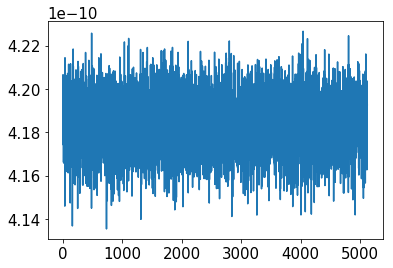

In [9]:
plt.plot(M18_02.data["gauss"][0,:,1] - M18_02.data["gauss"][1,:,1])

In [14]:
%load_ext autoreload

In [15]:
exportedDict = M18_02.exportDict()
%autoreload
M18_02 = analyseMeasurement(diagnose = True)
M18_02.importDict(exportedDict)

exportDict done
importDict done
